# Analisis de los datos

## Importaciones

In [2]:
import numpy as np
import pandas as pd

In [3]:
import pylab as plt
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
train = pd.read_csv('./data/train.csv')

## Analisis rápido de los datos

In [26]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [27]:
train.shape

(200000, 202)

In [28]:
integer_columns = train.select_dtypes(include=['int64']).columns 
float_columns = train.select_dtypes(include=['float64']).columns 
object_columns = train.select_dtypes(include=['object']).columns 
print('El número de columnas enteras es:', len(integer_columns))
print('El número de columnas float es:', len(float_columns))
print('El número de columnas object es:', len(object_columns))

El número de columnas enteras es: 1
El número de columnas float es: 200
El número de columnas object es: 1


Todas las columnas del dataframe son numéricas con la única exepción de la columna 'ID_code', que se va a usar de index

In [29]:
train.set_index('ID_code').head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


El porcentaje de 1 en el targes es: 0.89951
El porcentaje de 0 en el targes es: 0.10049


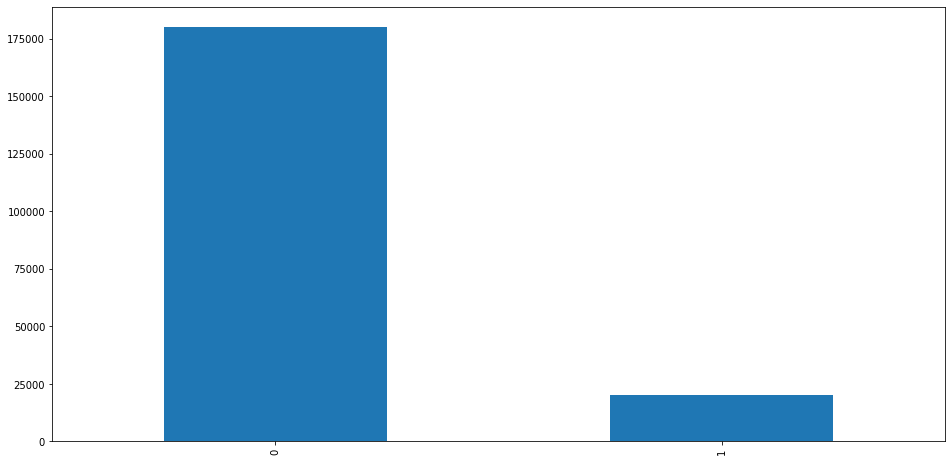

In [30]:
train.target.value_counts().plot(kind='bar', figsize=(16,8));
print('El porcentaje de 1 en el targes es:', list(train.target.value_counts())[0]/train.shape[0])
print('El porcentaje de 0 en el targes es:', list(train.target.value_counts())[1]/train.shape[0])

Hay una mayor cantidad de 0 que de 1 en la columna de target, esto va a generar un sesgo en las predicciones, por lo que va a tener que remediarse

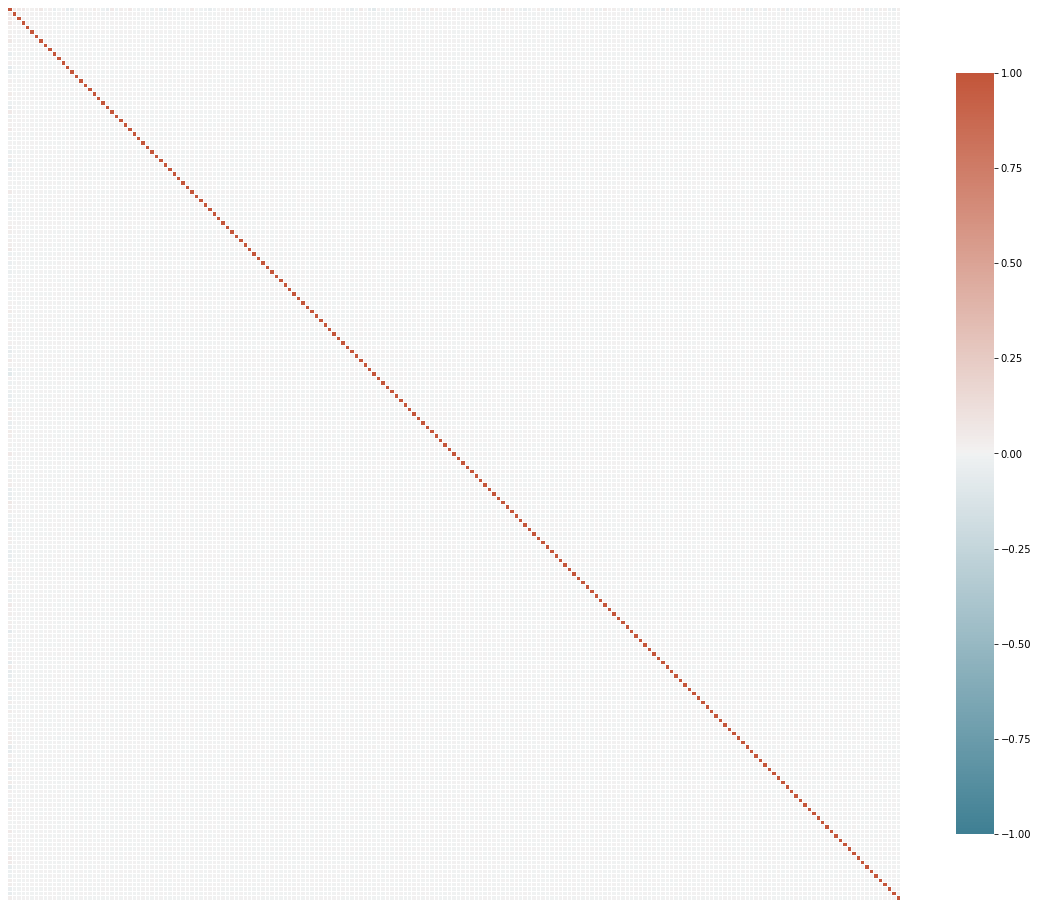

In [11]:
plt.figure(figsize=(20,20)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(train.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=False,
            cbar_kws={"shrink": .7
                     },# barra lateral
            xticklabels=False,
            yticklabels=False
);

Se comprueba que no hay correlacion entre columnas

## Reducción de dimensiones

Lo primero que se va a hacer es examinar, con la ayuda de un random forest classifier, la importancia  relativa de las diferentes columnas

In [20]:
forest = RandomForestClassifier(random_state=0)
forest.fit(train.drop(columns=['ID_code', 'target']), train.target)

RandomForestClassifier(random_state=0)

In [24]:
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=train.drop(columns=['ID_code', 'target']).columns)

In [32]:
importances.min(), importances.max(), importances.sum()

(0.0036808527435694986, 0.012137029935274584, 1.0)

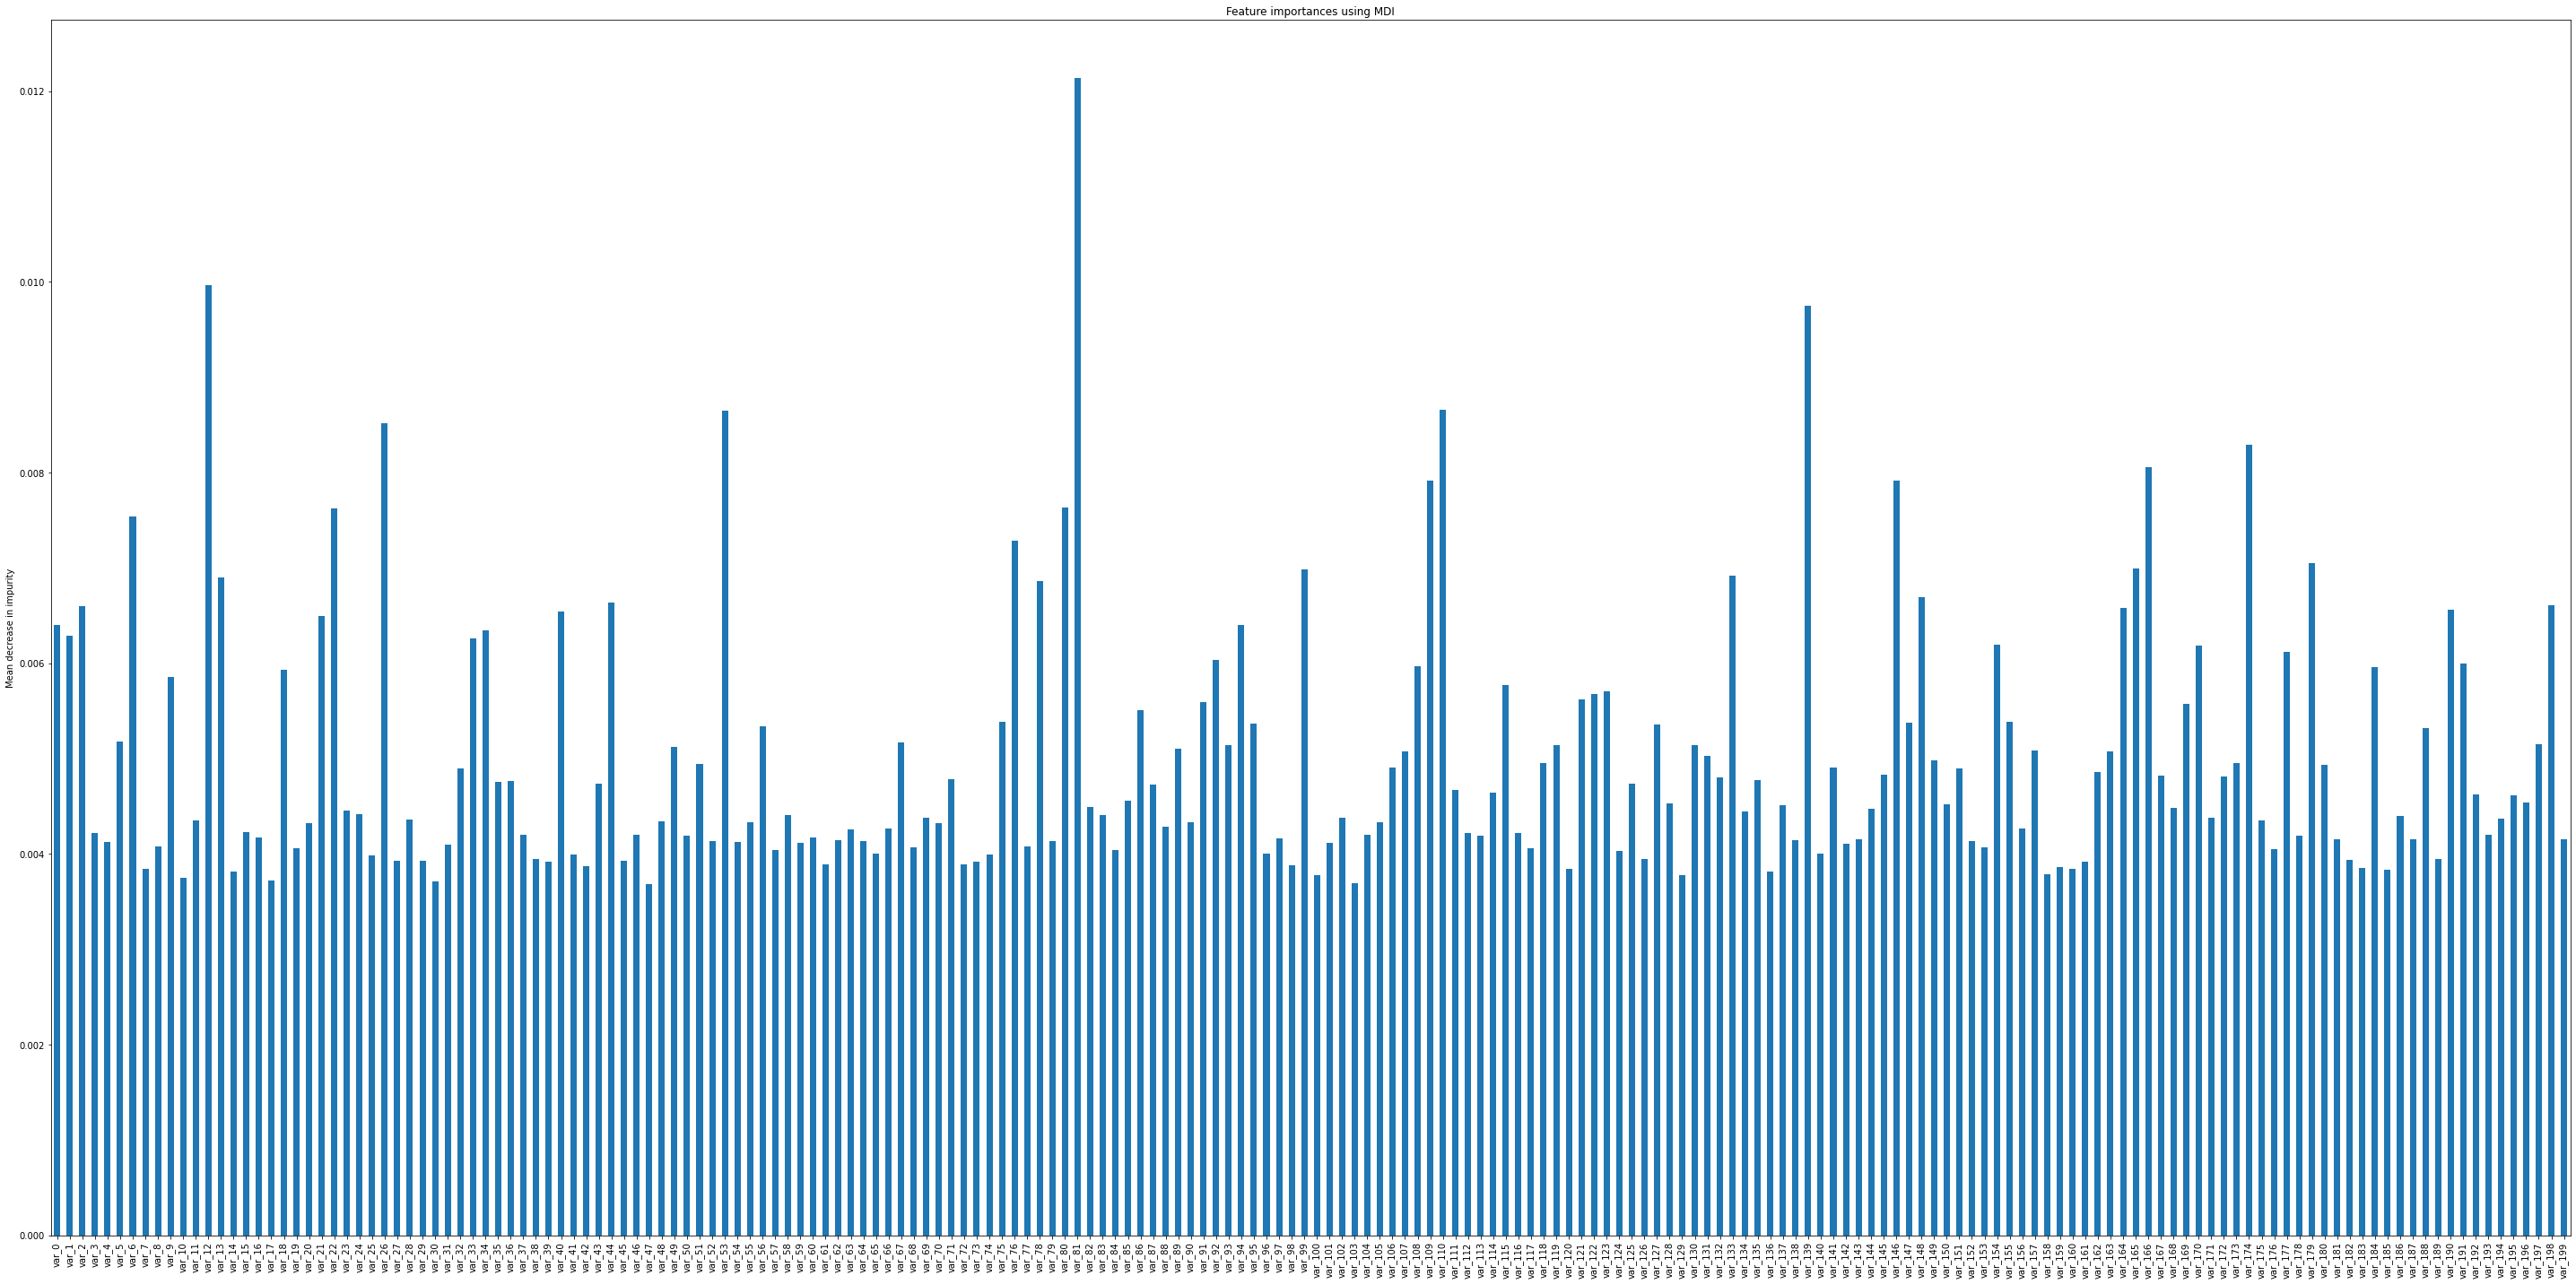

In [29]:
fig, ax = plt.subplots()
forest_importances.plot(kind='bar', figsize=(40,20))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Se comprueba que las importancias relativas de las columnas se mueven en un rango de (0.003, 0.012), por lo que no hay una diferencia considerable entre los valores que nos permita eliminar columnas sin perder mucha información

Ahora se va a probar a hacer la reducción de dimensiones con PCA

In [12]:
train_std = StandardScaler().fit_transform(train.drop(columns=['ID_code','target']))

In [13]:
pca=PCA()
pca.fit(train_std);

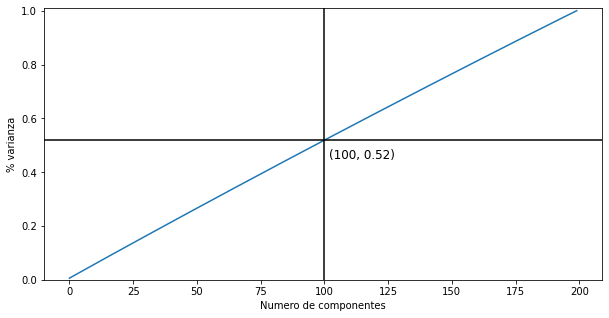

In [14]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.axvline(x=100, color='black')
plt.axhline(y=0.52, color='black')
plt.text(x=102, y=0.45, s='(100, 0.52)', fontsize=12)


plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

Como se ha visto, todas los valores propios del dataframe normalizado aportan la misma cantidad de información, se va a probar ahora el mismo proceso, pero sin la normalización

In [6]:
pca=PCA()
pca.fit(train.drop(columns=['ID_code','target']));

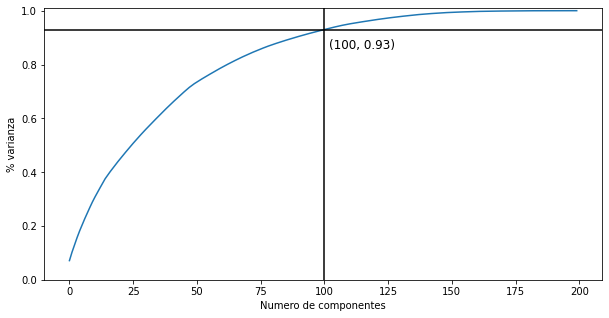

In [7]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.axvline(x=100, color='black')
plt.axhline(y=0.93, color='black')
plt.text(x=102, y=0.86, s='(100, 0.93)', fontsize=12)

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0, 1.01]);

In [8]:
train_pca=pd.DataFrame(pca.fit_transform(train.drop(columns=['ID_code','target'])))
train_pca.insert(0, 'target', train.target)
train_pca.insert(0, 'ID_code', train.ID_code)
train_pca.head()

,ID_code,target,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,train_0,0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,...,0.472871,-0.223471,0.087693,0.316206,0.036188,-0.009724,-0.133439,-0.112394,-0.210809,-0.008022
1,train_1,0,34.878028,11.469291,-3.759774,-19.274506,-8.543841,6.984967,-15.539528,-2.989574,...,0.225520,0.195946,0.182048,-0.232250,0.273408,-0.009637,0.141256,-0.272166,-0.112777,0.003286
2,train_2,0,-4.790239,-0.334213,11.359318,8.533317,1.328571,-3.218286,22.019436,-1.662104,...,0.471320,-0.438071,-0.188489,-0.217870,0.103748,0.165172,-0.180427,-0.032231,0.100097,0.003955
3,train_3,0,11.875370,14.050808,24.017588,-4.419429,0.372725,5.805502,20.132591,12.235285,...,-0.292114,0.062670,0.422309,-0.334294,-0.226519,-0.152877,-0.219387,0.108135,0.048418,0.003421
4,train_4,0,52.713134,24.315340,4.334400,23.857627,-17.868964,16.346566,-15.373475,11.752637,...,-0.071497,-0.123040,-0.107644,-0.068425,-0.243074,-0.164265,0.126321,-0.136637,0.008738,0.011002


In [9]:
train_pca.to_csv('./data/train_pca.csv', index=False)